# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Define units of measurement
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = url +"appid=" + weather_api_key + "&q="+ city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tidjikja
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | nuuk
Processing Record 4 of Set 1 | kamphaeng phet
Processing Record 5 of Set 1 | tual
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | tofol
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | hadibu
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | kiunga
Processing Record 16 of Set 1 | kolonia town
Processing Record 17 of Set 1 | san mariano
Processing Record 18 of Set 1 | belem
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | n'diareme limamoulaye
City not found. Skipping...
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | s

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tidjikja,18.5564,-11.4271,39.00,10,4,5.27,MR,1712858280
1,puerto natales,-51.7236,-72.4875,10.25,57,0,2.06,CL,1712857820
2,nuuk,64.1835,-51.7216,-2.29,86,14,1.79,GL,1712858281
3,kamphaeng phet,16.2500,99.5000,30.17,46,9,1.02,TH,1712858281
4,tual,-5.6667,132.7500,28.46,67,69,1.90,ID,1712858281


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tidjikja,18.5564,-11.4271,39.00,10,4,5.27,MR,1712858280
1,puerto natales,-51.7236,-72.4875,10.25,57,0,2.06,CL,1712857820
2,nuuk,64.1835,-51.7216,-2.29,86,14,1.79,GL,1712858281
3,kamphaeng phet,16.2500,99.5000,30.17,46,9,1.02,TH,1712858281
4,tual,-5.6667,132.7500,28.46,67,69,1.90,ID,1712858281


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

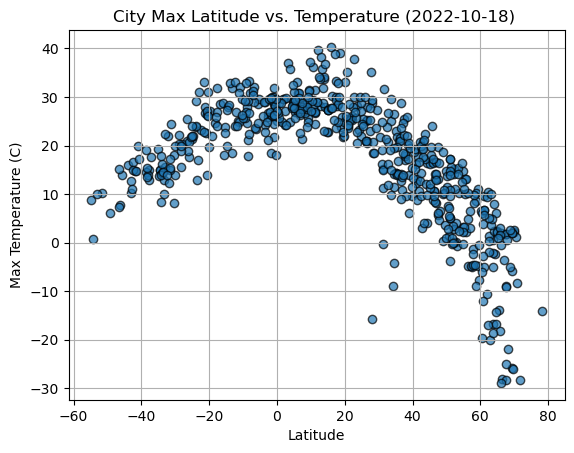

In [40]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

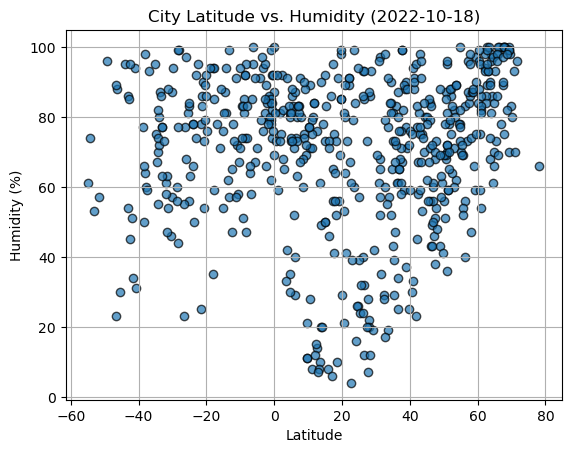

In [41]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, marker="o", edgecolors="black", alpha=0.7)
# plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

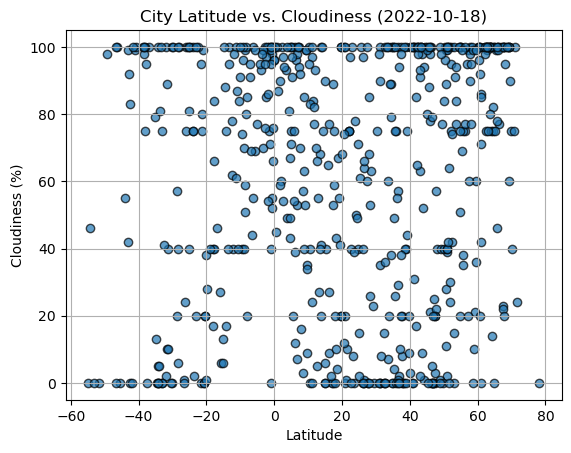

In [42]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, marker="o", edgecolors="black", alpha=0.7)
# plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

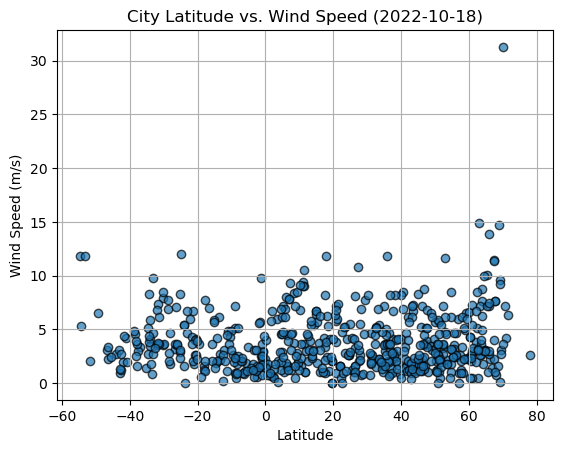

In [43]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, marker="o", edgecolors="black", alpha=0.7)
# plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, slop_coordinates, ylable):
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot data
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Annotate linear regression
    plt.annotate(line_eq, slop_coordinates, fontsize=15, color="red")

    # Set plot labels and title
    plt.xlabel("Latitude")
    plt.ylabel(ylable)

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tidjikja,18.5564,-11.4271,39.00,10,4,5.27,MR,1712858280
2,nuuk,64.1835,-51.7216,-2.29,86,14,1.79,GL,1712858281
3,kamphaeng phet,16.2500,99.5000,30.17,46,9,1.02,TH,1712858281
8,georgetown,5.4112,100.3354,29.41,83,20,1.03,MY,1712858282
9,tofol,5.3248,163.0078,27.01,86,100,7.17,FM,1712858282


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,10.25,57,0,2.06,CL,1712857820
4,tual,-5.6667,132.7500,28.46,67,69,1.90,ID,1712858281
5,port-aux-francais,-49.3500,70.2167,6.14,96,98,6.48,TF,1712858281
6,uturoa,-16.7333,-151.4333,28.62,78,46,7.02,PF,1712858281
7,avarua,-21.2078,-159.7750,28.03,83,75,6.69,CK,1712858077


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7075316266606854


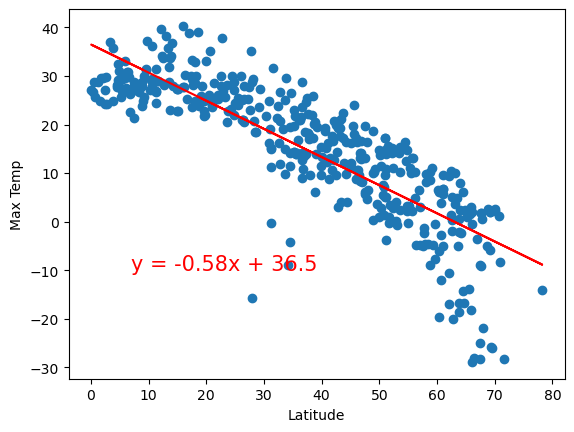

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, (7, -10), "Max Temp")

The r-squared is: 0.6186156669898862


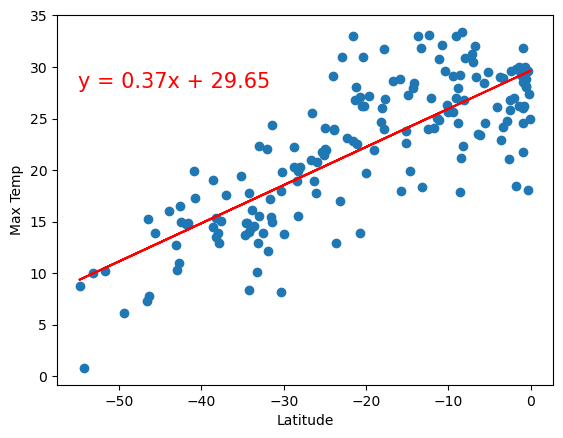

In [48]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, (-55, 28), "Max Temp")

**Discussion about the linear relationship:** <br>

Temperature vs. Latitude

Northern Hemisphere:
- The linear regression equation for maximum temperature and latitude in the Northern Hemisphere is y=−0.58x+36.5. This indicates that for every degree increase in latitude, there is a decrease of approximately 0.58°C in maximum temperature. The intercept of 36.5 suggests that at the equator (where latitude is 0), the predicted maximum temperature is approximately 36.5°C. The r-squared value of approximately 0.708 indicates that latitude explains about 70.8% of the variability in maximum temperature in the Northern Hemisphere.

Southern Hemisphere:
- The linear regression equation for maximum temperature and latitude in the Southern Hemisphere is y=0.37x+29.65. This suggests that for every degree increase in latitude, there is an increase of approximately 0.37°C in maximum temperature. This suggests that for every degree increase in latitude, there is an increase of approximately 0.37°C in maximum temperature. The r-squared value of approximately 0.619 indicates that latitude explains about 61.9% of the variability in maximum temperature in the Southern Hemisphere.

These observations suggest strong negative and positive linear relationships between maximum temperature and latitude in the Northern and Southern Hemispheres, respectively. This imply that latitude can be a useful predictor of maximum temperature.

 ===============================================================================================================================================================


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.10241865327021253


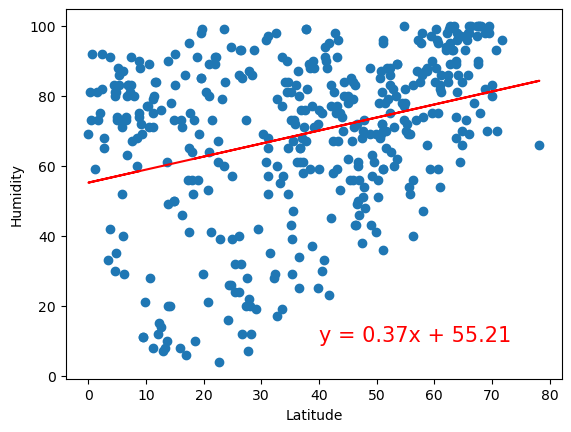

In [49]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, (40, 10),"Humidity")

The r-squared is: 0.08536569585766354


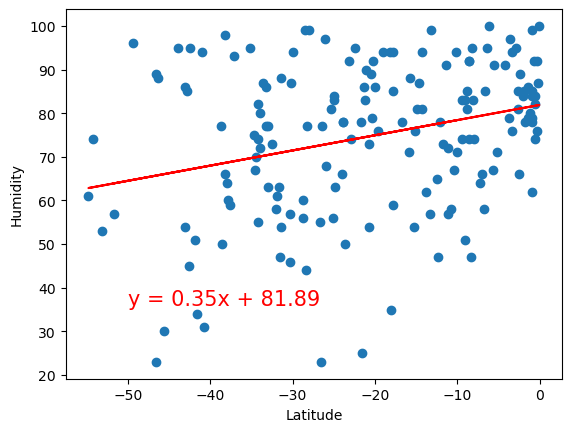

In [50]:
# Southern Hemispheree
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, (-50, 36),"Humidity")

**Discussion about the linear relationship:** <br>

Humidity vs. Latitude

Northern Hemisphere:
- The linear regression equation for humidity and latitude in the Northern Hemisphere is y=0.37x+55.21. This indicates that for every degree increase in latitude, there is an increase of approximately 0.37% in humidity. The intercept of 55.21 suggests that at the equator (where latitude is 0), the predicted humidity is approximately 55.21%. The r-squared value of approximately 0.102 indicates that latitude explains about 10.2% of the variability in humidity in the Northern Hemisphere.

Southern Hemisphere:
- The linear regression equation for humidity and latitude in the Southern Hemisphere is y=0.35x+81.89. This suggests that for every degree increase in latitude, there is an increase of approximately 0.35% in humidity. The intercept of 81.89 indicates that at the equator (where latitude is 0), the predicted humidity is approximately 81.89%. The r-squared value of approximately 0.085 indicates that latitude explains about 8.5% of the variability in humidity in the Southern Hemisphere.

These observations suggest that there may be slight positive linear relationships between humidity and latitude in both hemispheres, but the relationships are weak. Latitude alone may not be a reliable predictor of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.018976161929058696


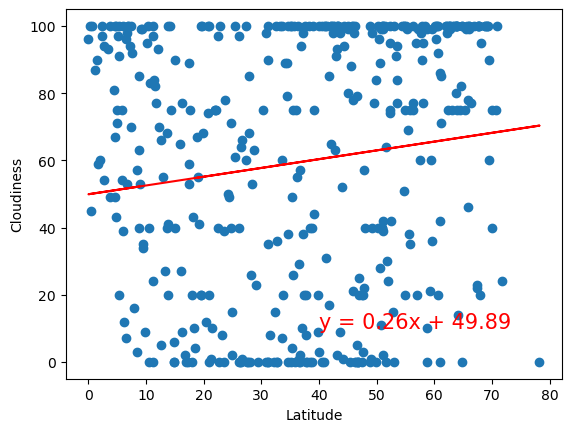

In [51]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, (40, 10),"Cloudiness")

The r-squared is: 0.0818161277553575


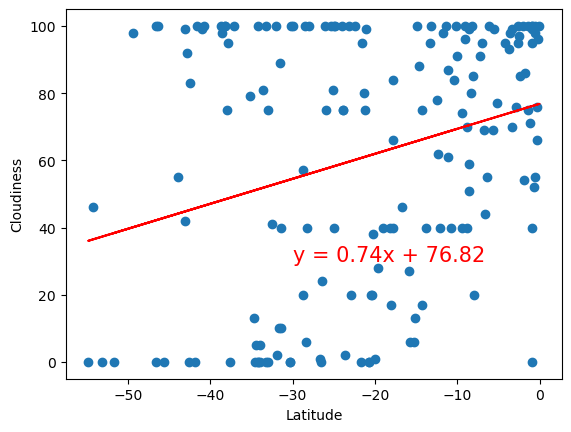

In [53]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, (-30, 30),"Cloudiness")

**Discussion about the linear relationship:** <br>

Cloudiness vs. Latitude

Northern Hemisphere:
- The linear regression equation for cloudiness and latitude in the Northern Hemisphere is y=0.26x+49.89. This indicates that for every degree increase in latitude, there is an increase of approximately 0.26% in cloudiness. The intercept of 49.89 suggests that at the equator (where latitude is 0), the predicted cloudiness is approximately 49.89%. The r-squared value of approximately 0.019 indicates that latitude explains about 1.9% of the variability in cloudiness in the Northern Hemisphere.

Southern Hemisphere:
- The linear regression equation for cloudiness and latitude in the Southern Hemisphere is y=0.74x+76.82. This suggests that for every degree increase in latitude, there is an increase of approximately 0.74% in cloudiness. The intercept of 76.82 indicates that at the equator (where latitude is 0), the predicted cloudiness is approximately 76.82%. The r-squared value of approximately 0.082 indicates that latitude explains about 8.2% of the variability in cloudiness in the Southern Hemisphere.

These observations suggest that there may be slight positive linear relationships between cloudiness and latitude in both hemispheres, but the relationships are weak. Latitude alone may not be a reliable predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009832239044529675


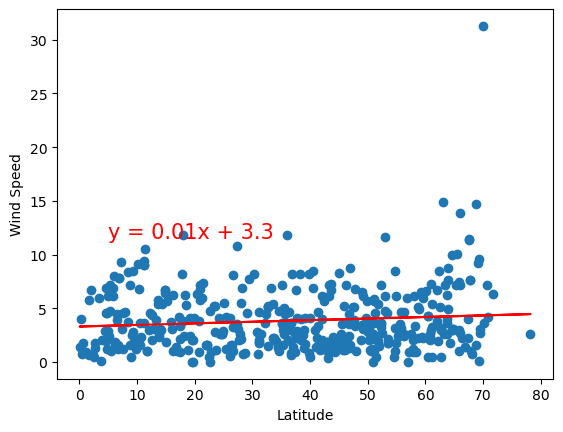

In [54]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, (5, 11.5),"Wind Speed")

The r-squared is: 0.09603054894180725


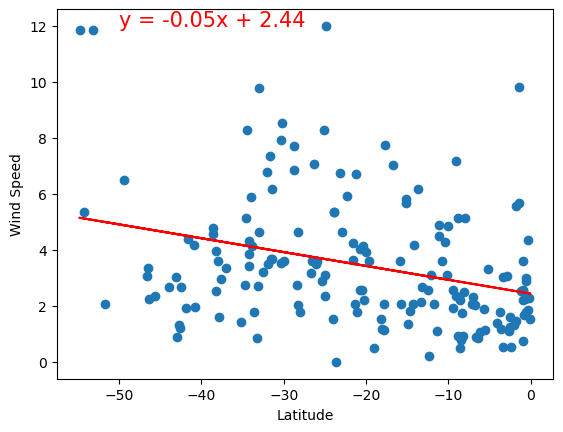

In [55]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, (-50, 12),"Wind Speed")

**Discussion about the linear relationship:** <br>

Wind Speed vs. Latitude

Northern Hemisphere:
- The linear regression equation for wind speed and latitude in the Northern Hemisphere is y=0.01x+3.3. This indicates that for every degree increase in latitude, there is an increase of approximately 0.01 units in wind speed. The intercept of 3.3 suggests that at the equator (where latitude is 0), the predicted wind speed is approximately 3.3 units. The r-squared value of approximately 0.010 indicates that latitude explains about 1% of the variability in wind speed in the Northern Hemisphere.

Southern Hemisphere:
- The linear regression equation for wind speed and latitude in the Southern Hemisphere is y=−0.05x+2.44. This suggests that for every degree increase in latitude, there is a decrease of approximately 0.05 units in wind speed. The intercept of 2.44 indicates that at the equator (where latitude is 0), the predicted wind speed is approximately 2.44 units. The r-squared value of approximately 0.096 indicates that latitude explains about 9.6% of the variability in wind speed in the Southern Hemisphere.

These observations suggest that there may be slight positive and negative linear relationships between wind speed and latitude in Northern and Southern Hemispheres, respectively, but the relationships are weak. Latitude alone may not be a reliable predictor of wind speed.